In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

In [170]:
df = pd.read_csv('./Salary_Data.csv')
df.sample(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
5220,32.0,Male,PhD,Data Scientist,9.0,140000.0
3231,28.0,Male,Bachelor's Degree,Software Engineer,4.0,75000.0
4939,30.0,Male,Master's Degree,Financial Manager,7.0,120000.0
3783,27.0,Male,Bachelor's Degree,Software Developer,3.0,60000.0
2962,45.0,Male,Master's Degree,Senior Software Engineer,22.0,182506.0
4133,26.0,Female,Bachelor's Degree,Junior Software Developer,2.0,35000.0
4867,30.0,Female,Bachelor's Degree,Marketing Coordinator,4.0,57000.0
2147,41.0,Male,Master's Degree,Software Engineer Manager,14.0,180000.0
4452,30.0,Female,Bachelor's Degree,Marketing Coordinator,4.0,58000.0
5536,28.0,Female,Bachelor's Degree,Marketing Analyst,3.0,60000.0


# Data Preparation

In [171]:
df.shape

(6704, 6)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [173]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


Missing Value
---


In [174]:
# เช็คว่ามี Missing Value ไหม
df.isna().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [175]:
df.dropna(inplace=True) #นำข้อมูลที่มี Missing value ออก

In [176]:
df.isnull().sum() #Missing Value หายไปแล้ว

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

Dupliicates
----

In [177]:
#แสดงให้ดูว่ามีข้อมูลซ้ำ
df[df.duplicated()].sort_values(by='Age')

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
5109,21.0,Female,High School,Junior Sales Representative,0.0,25000.0
5122,21.0,Female,High School,Junior Sales Representative,0.0,25000.0
4910,21.0,Female,High School,Junior Sales Representative,0.0,25000.0
4975,21.0,Female,High School,Junior Sales Representative,0.0,25000.0
5031,21.0,Female,High School,Junior Sales Representative,0.0,25000.0
...,...,...,...,...,...,...
2476,60.0,Female,PhD,Software Engineer Manager,33.0,179180.0
1277,61.0,Male,PhD,Software Engineer Manager,20.0,200000.0
1258,62.0,Male,PhD,Software Engineer Manager,19.0,200000.0
1305,62.0,Male,PhD,Software Engineer Manager,19.0,200000.0


In [178]:
df.drop_duplicates(inplace=True)
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6623,43.0,Female,Master's Degree,Digital Marketing Manager,15.0,150000.0
6624,27.0,Male,High School,Sales Manager,2.0,40000.0
6625,33.0,Female,Bachelor's Degree,Director of Marketing,8.0,80000.0
6628,37.0,Male,Bachelor's Degree,Sales Director,7.0,90000.0


In [179]:
df.duplicated().sum()

0

In [180]:
df.shape

(1787, 6)

Convert
----

In [181]:
df["Age"] = df["Age"].astype(int)
df["Years of Experience"] = df["Years of Experience"].astype(int)
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5,90000.0
1,28,Female,Master's,Data Analyst,3,65000.0
2,45,Male,PhD,Senior Manager,15,150000.0
3,36,Female,Bachelor's,Sales Associate,7,60000.0
4,52,Male,Master's,Director,20,200000.0
...,...,...,...,...,...,...
6623,43,Female,Master's Degree,Digital Marketing Manager,15,150000.0
6624,27,Male,High School,Sales Manager,2,40000.0
6625,33,Female,Bachelor's Degree,Director of Marketing,8,80000.0
6628,37,Male,Bachelor's Degree,Sales Director,7,90000.0


In [182]:
# ตรวจสอบว่ามีเพศอะไรบ้าง
df["Gender"].value_counts().reset_index()

,Gender,count
0,Male,966
1,Female,814
2,Other,7


In [183]:
# ตรวจสอบ ตำแหน่งงาน
df["Job Title"].value_counts().reset_index()

,Job Title,count
0,Software Engineer Manager,127
1,Full Stack Engineer,122
2,Senior Software Engineer,96
3,Senior Project Engineer,95
4,Back end Developer,81
...,...,...
186,Financial Advisor,1
187,Junior Designer,1
188,Chief Technology Officer,1
189,Technical Recruiter,1


In [184]:
# ตรวจสอบ ระดับการศึกษา
df["Education Level"].value_counts().reset_index()

,Education Level,count
0,Bachelor's Degree,506
1,Master's Degree,446
2,PhD,340
3,Bachelor's,262
4,Master's,122
5,High School,110
6,phD,1


In [185]:
# จะเห็นว่า ความหมายของคำเหมือนกัน แค่เขียนต่างกัน
# Master's Degree == Master's
# PhD == phD
# Bachelor's Degree == Bachelor's


# รวมระดับการศึกษาที่มีความหมายเหมือนกัน เข้าด้วยกัน
df.replace("phD", "PhD", inplace=True)
df.replace("Master's", "Master's Degree", inplace=True)
df.replace("Bachelor's", "Bachelor's Degree", inplace=True)

In [186]:
# ตรวจสอบอีกครั้ง
df["Education Level"].value_counts().reset_index()

,Education Level,count
0,Bachelor's Degree,768
1,Master's Degree,568
2,PhD,341
3,High School,110


#  EDA


Text(0.5, 0, 'count')

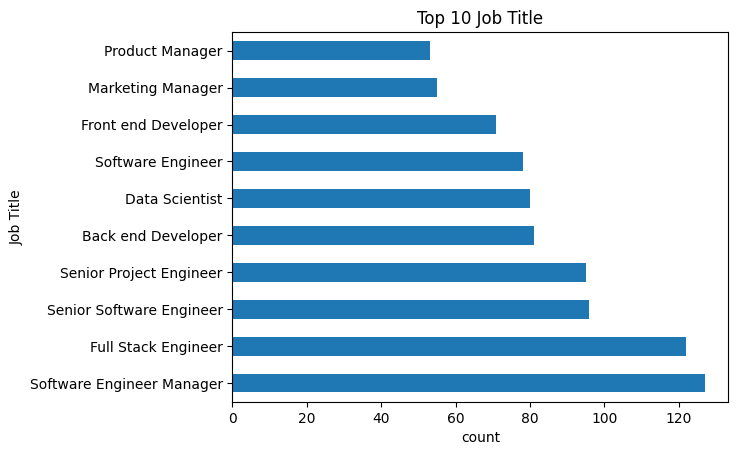

In [215]:
ax = df["Job Title"].value_counts().head(10).plot(kind="barh", title="Top 10 Job Title")
ax.set_xlabel("count")

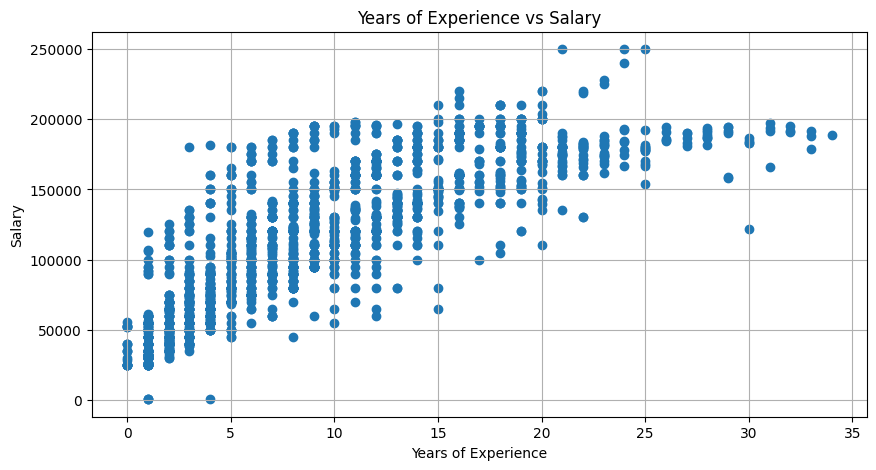

In [188]:
# plot กราฟ เงินเดืน - ประสบการทำงาน
plt.figure(figsize=(10, 5))
plt.scatter(df["Years of Experience"], df["Salary"])
plt.title("Years of Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid(True)
plt.show()

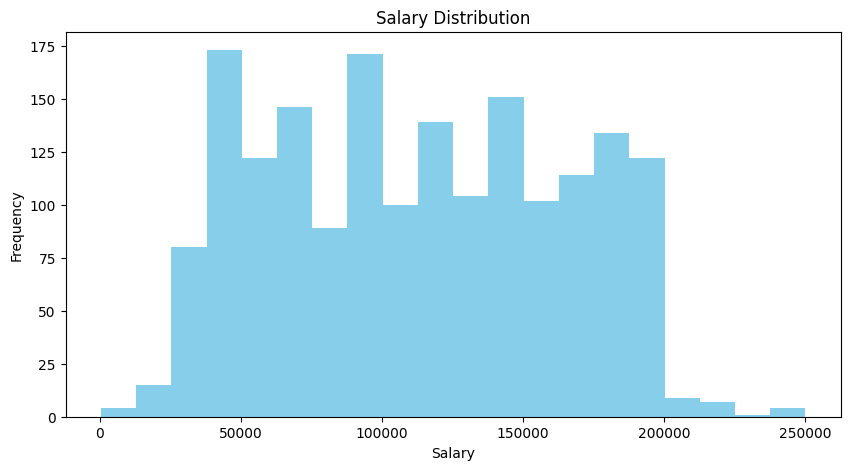

In [192]:
# Histogram ของเงินเดือน
plt.figure(figsize=(10, 5))
plt.hist(df["Salary"], bins=20, color="skyblue")
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()